In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import json

In [2]:
agents = ["AlwaysDefect","AlwaysCooperate","TitforTat","NotTitforTat"]

In [3]:
import glob

files = glob.glob('data*.csv')
files.remove('data.csv')
frame = pd.DataFrame()
list_ = []
for file_ in files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)

In [4]:
df.iloc[0]['agent1'].split(',')

['[0.25',
 ' 0.2500007714399645',
 ' 0.24999961610429156',
 ' 0.24999921181917847',
 ' 0.24999609919235175',
 ' 0.25000073642512644',
 ' 0.24999885851905976',
 ' 0.24999941853815194',
 ' 0.25000219936099305',
 ' 0.25000205498604566',
 ' 0.2500012571427297',
 ' 0.25000257330932685',
 ' 0.25000533830468846',
 ' 0.25000458024525907',
 ' 0.2500045289100808',
 ' 0.2500043238585248',
 ' 0.2500075220001205',
 ' 0.2500059676727295',
 ' 0.2500126443968807',
 ' 0.25001165280285637',
 ' 0.2500113105318635',
 ' 0.25001399906352356',
 ' 0.25001508969057484',
 ' 0.2500145315257881',
 ' 0.2500165905144731',
 ' 0.25001699208067035',
 ' 0.25001991849014626',
 ' 0.25001938118752826',
 ' 0.25002046642515124',
 ' 0.2500196918082422',
 ' 0.25001803611941387',
 ' 0.2500163895492324',
 ' 0.2500161815764491',
 ' 0.2500204273814755',
 ' 0.25002005828756624',
 ' 0.25001975436669976',
 ' 0.250020170891065',
 ' 0.2500197223018047',
 ' 0.25002076768824033',
 ' 0.2500214442414197',
 ' 0.25002483989210383',
 ' 0.250

## Use these graphs to find which combinations are 'interesting'

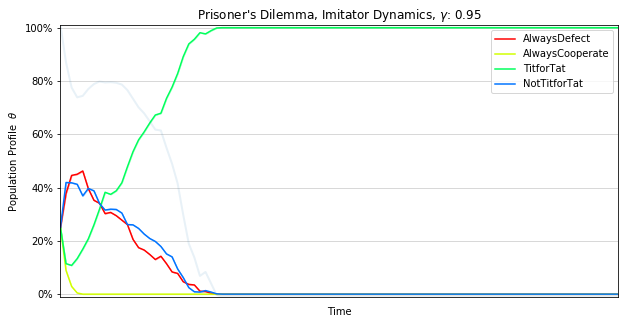

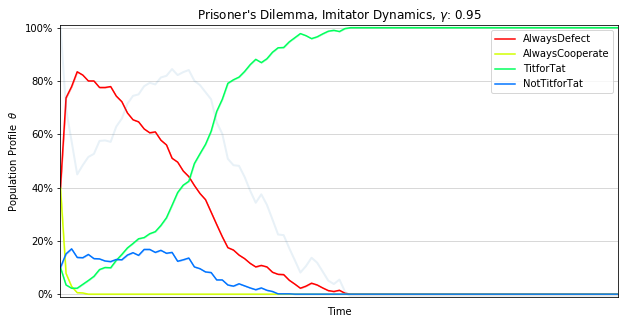

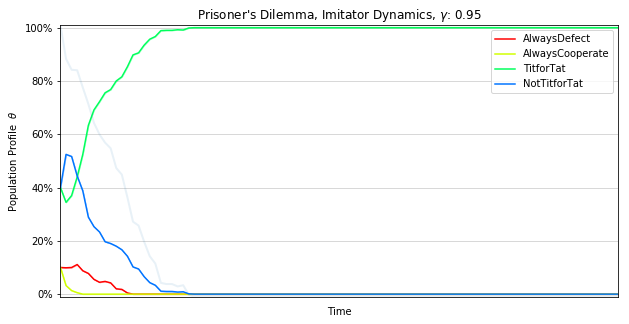

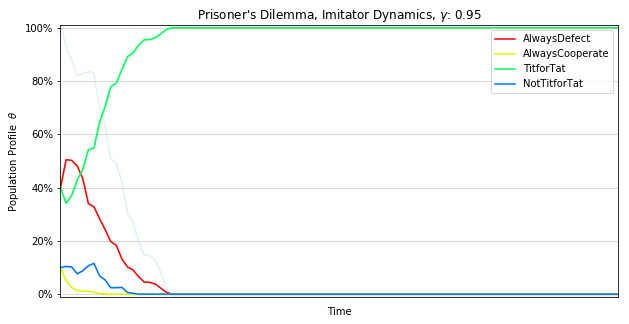

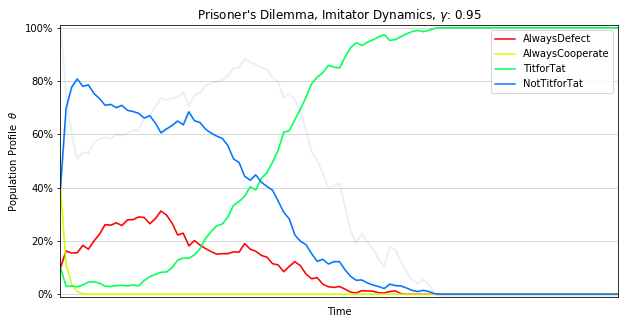

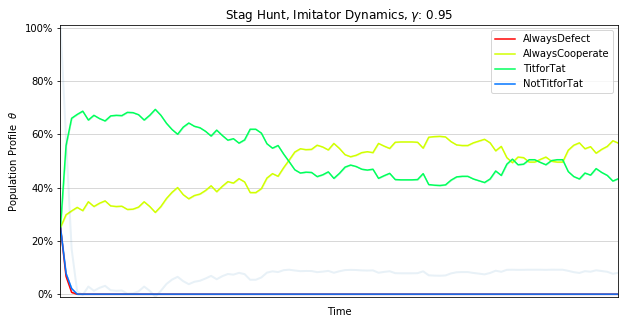

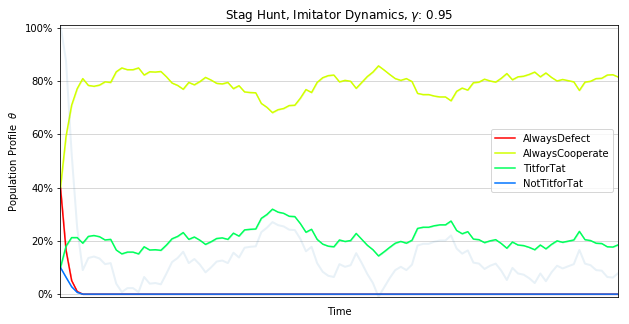

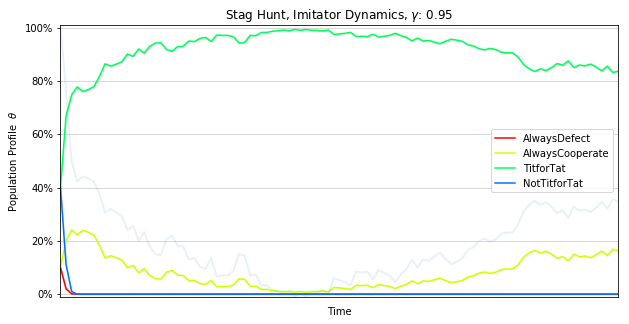

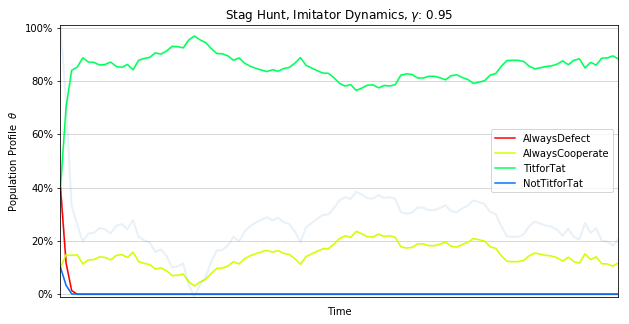

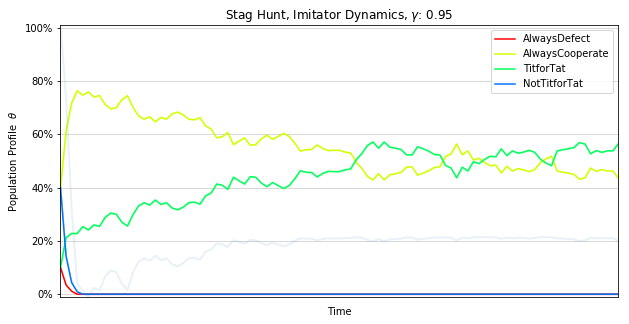

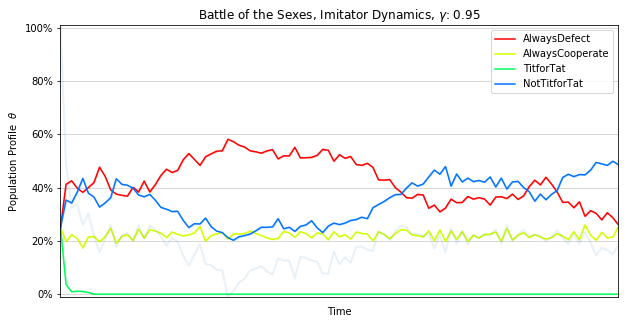

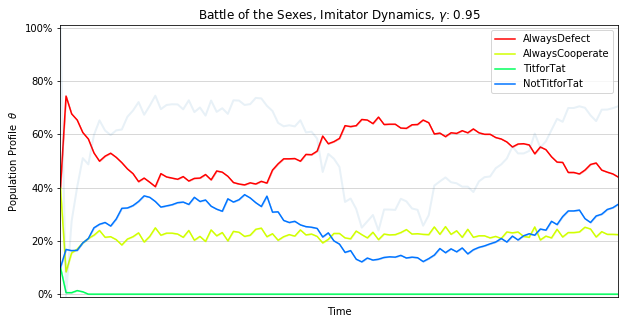

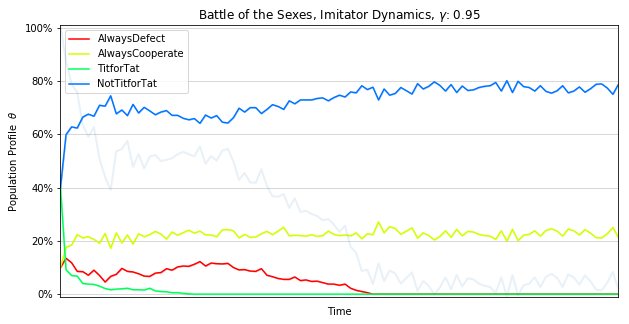

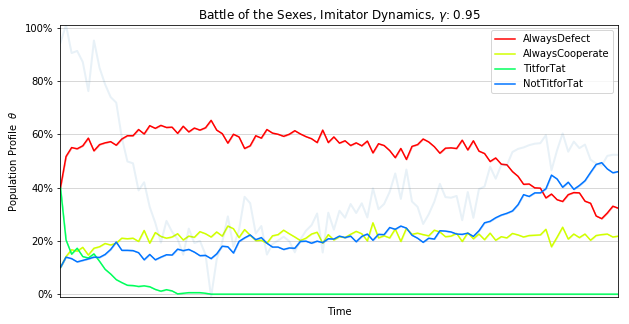

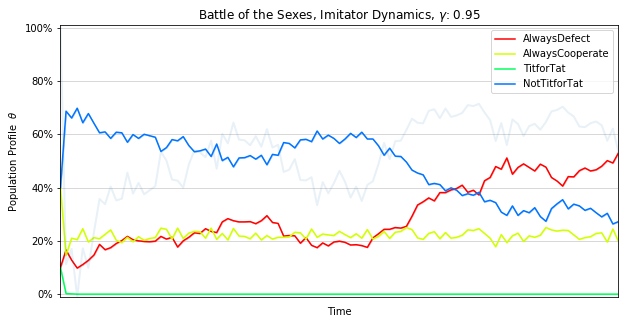

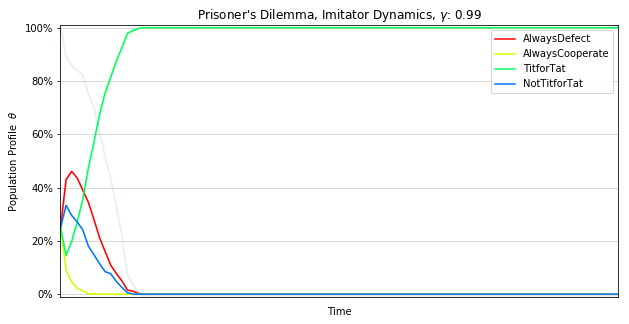

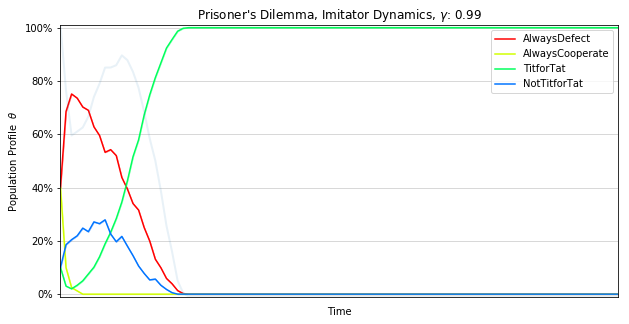

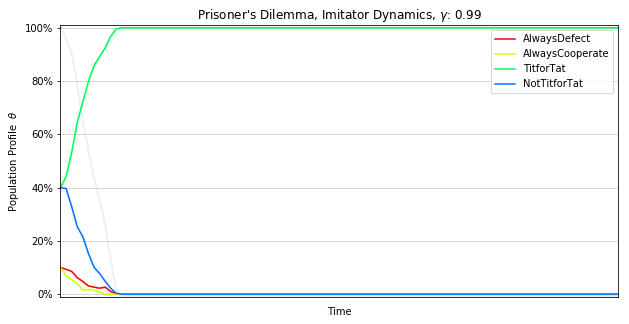

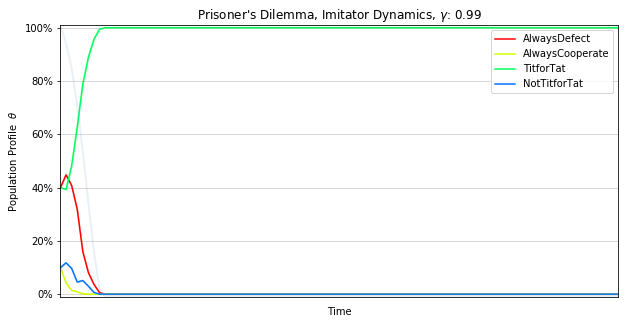

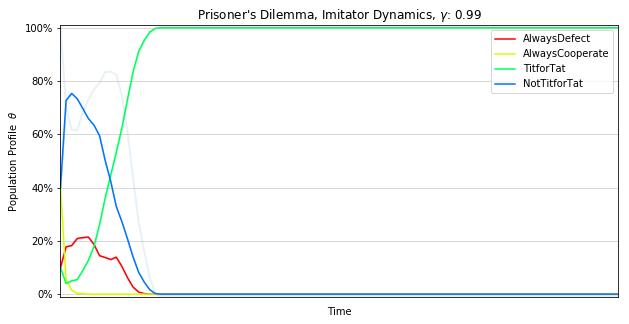

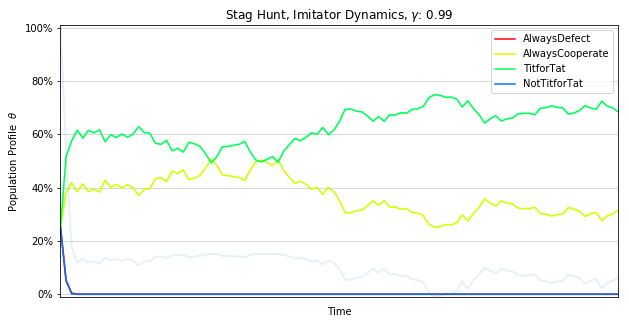

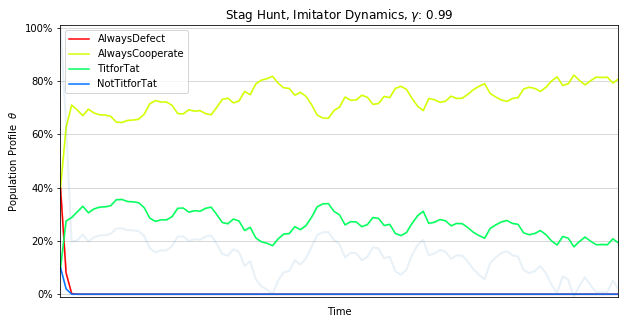

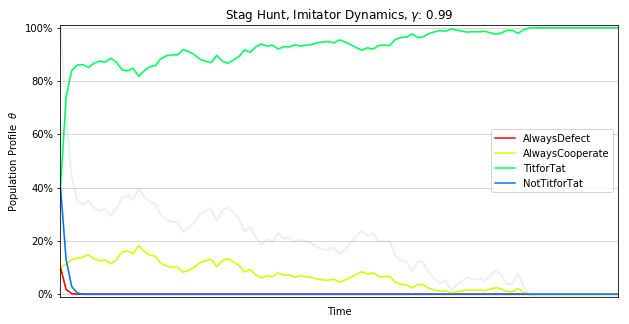

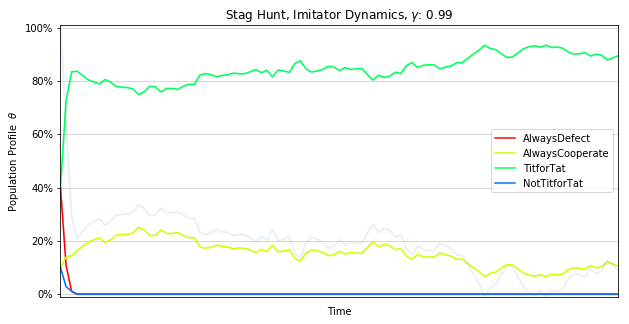

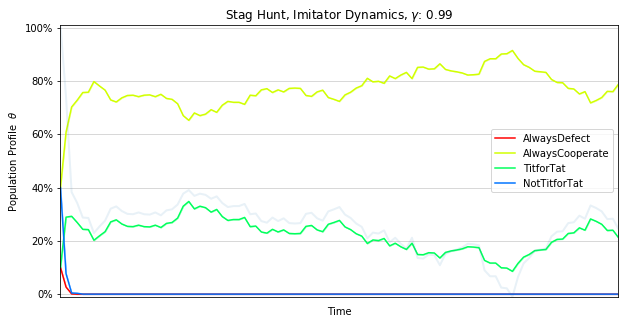

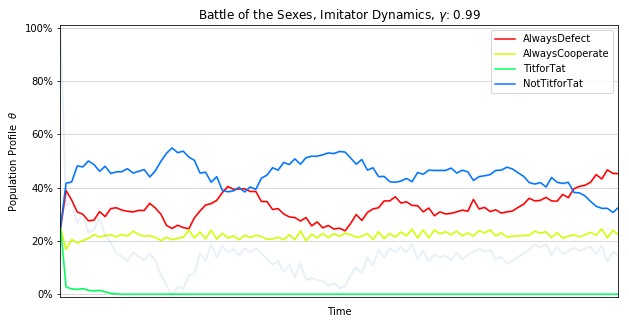

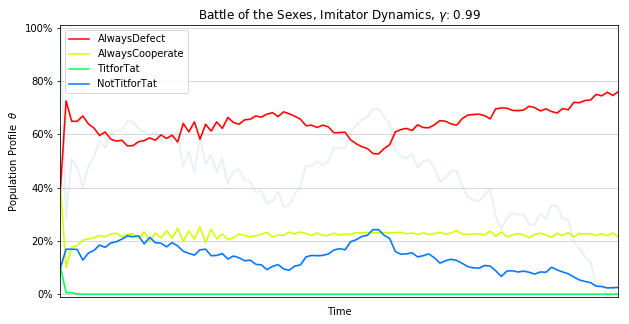

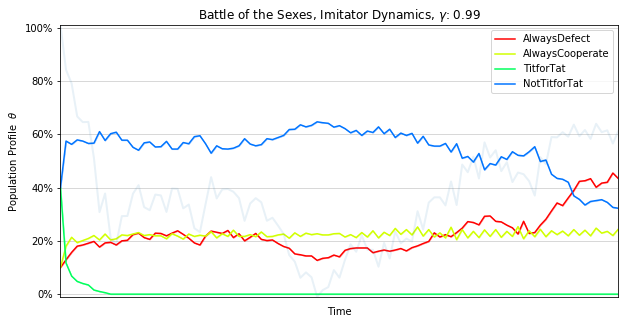

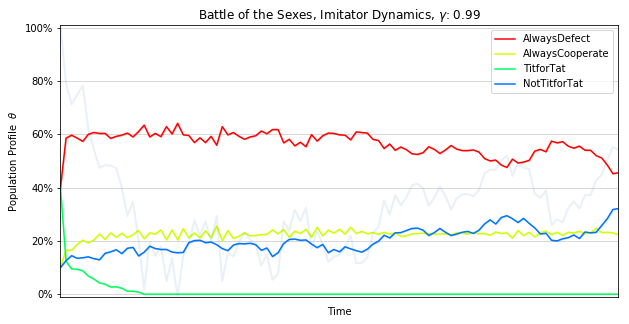

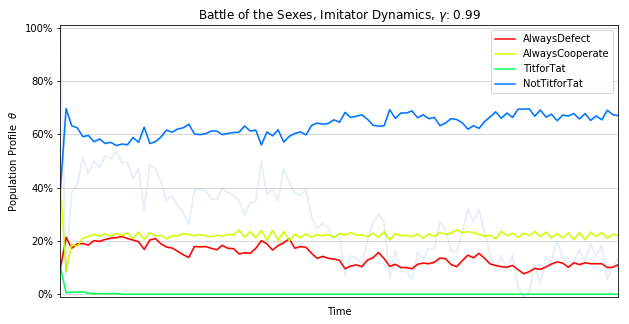

Prisoner's Dilemma & Imitator & $0.95$ & $100$ & $0.23$\\
Prisoner's Dilemma & Imitator & $0.95$ & $100$ & $0.31$\\
Prisoner's Dilemma & Imitator & $0.95$ & $100$ & $0.12$\\
Prisoner's Dilemma & Imitator & $0.95$ & $100$ & $0.12$\\
Prisoner's Dilemma & Imitator & $0.95$ & $100$ & $0.44$\\
Stag Hunt & Imitator & $0.95$ & $100$ & $0.69$\\
Stag Hunt & Imitator & $0.95$ & $100$ & $0.53$\\
Stag Hunt & Imitator & $0.95$ & $100$ & $0.27$\\
Stag Hunt & Imitator & $0.95$ & $100$ & $0.42$\\
Stag Hunt & Imitator & $0.95$ & $100$ & $0.68$\\
Battle of the Sexes & Imitator & $0.95$ & $100$ & $1.05$\\
Battle of the Sexes & Imitator & $0.95$ & $100$ & $1.00$\\
Battle of the Sexes & Imitator & $0.95$ & $100$ & $0.69$\\
Battle of the Sexes & Imitator & $0.95$ & $100$ & $1.02$\\
Battle of the Sexes & Imitator & $0.95$ & $100$ & $1.01$\\
Prisoner's Dilemma & Imitator & $0.99$ & $100$ & $0.11$\\
Prisoner's Dilemma & Imitator & $0.99$ & $100$ & $0.17$\\
Prisoner's Dilemma & Imitator & $0.99$ & $100$ & $0.07

In [38]:
import seaborn

plt.rcParams["figure.figsize"] = (10,5)
table = []

def handle(df, M):
    xs = range(M.shape[2])
    ys = M.mean(0)
    stds = M.std(0) #+ 0.1 * np.random.randn(M.shape[1], M.shape[2])
    cmap = plt.cm.get_cmap('hsv', 6)
    
    int_entropy = -np.sum(ys * np.log(ys + 0.00001), axis=0)
    
    if df.iloc[0]["dynamics"] == 'replicator':
        return
        
    for i in range(4):
        plt.grid(True, 'major', 'y', ls='-', lw=.5, c='k', alpha=.3)
        plt.plot(xs, ys[i], label=agents[i], color=cmap(i), linewidth=1.5)
        plt.fill_between(xs, ys[i]-2 * stds[i], ys[i]+2 * stds[i], alpha=0.10, facecolor='red', color=cmap(i))
        plt.fill_between(xs, ys[i]-stds[i], ys[i]+stds[i], alpha=0.15, facecolor='red', color=cmap(i))
    plt.title("{}, {} Dynamics, $\\gamma$: {}".format(df.iloc[0]["game"], df.iloc[0]["dynamics"].capitalize(), df.iloc[0]["gamma"]))
    plt.ylabel('Population Profile  $\\theta$')
    plt.xlabel('Time', labelpad=10)
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
    plt.legend()
    plt.ylim((-.01,1.01))
    plt.xlim(0, xs[-1])
    
    plt.twinx()
    plt.gca().set_yticks([])
    plt.plot(int_entropy, alpha=.10, linewidth=2, label='entropy')
    plt.ylim(int_entropy.min(), int_entropy.max())
    plt.show()
    
    table.append('{} & {} & ${}$ & ${}$ & ${:.2f}$\\\\'.format(df.iloc[0]["game"], 
                                              df.iloc[0]["dynamics"].capitalize(),
                                              df.iloc[0]["gamma"],
                                              df.iloc[0]["generations_until_stability"], 
                                              np.mean(int_entropy)))

sims = []
for dynamics in df['dynamics'].unique():
    for gamma in df['gamma'].unique():
        for game in df['game'].unique():
            for distro in df['initial_distribution'].unique():
                subset = df[(df['dynamics'] == dynamics) & (df['gamma'] == gamma) & (df['game'] == game) & (df['initial_distribution'] == distro)]

                data = []
                for i, r in subset.iterrows():
                    plays1 = np.array(json.loads(df.iloc[i]['agent1']))
                    plays2 = np.array(json.loads(df.iloc[i]['agent2']))
                    plays3 = np.array(json.loads(df.iloc[i]['agent3']))
                    plays4 = np.array(json.loads(df.iloc[i]['agent4']))
                    M = np.vstack([plays1, plays2, plays3, plays4])
                    data.append(M)

                M = np.array(data)
                
                handle(subset, M)
                
len(table)
print('\n'.join(table))

Prisoner's Dilemma & Imitator & $0.95$ & $100$ & $nan$\\
Prisoner's Dilemma & Imitator & $0.95$ & $100$ & $nan$\\
Prisoner's Dilemma & Imitator & $0.95$ & $100$ & $nan$\\
Prisoner's Dilemma & Imitator & $0.95$ & $100$ & $nan$\\
Prisoner's Dilemma & Imitator & $0.95$ & $100$ & $nan$\\
Stag Hunt & Imitator & $0.95$ & $100$ & $nan$\\
Stag Hunt & Imitator & $0.95$ & $100$ & $nan$\\
Stag Hunt & Imitator & $0.95$ & $100$ & $nan$\\
Stag Hunt & Imitator & $0.95$ & $100$ & $nan$\\
Stag Hunt & Imitator & $0.95$ & $100$ & $nan$\\
Battle of the Sexes & Imitator & $0.95$ & $100$ & $nan$\\
Battle of the Sexes & Imitator & $0.95$ & $100$ & $nan$\\
Battle of the Sexes & Imitator & $0.95$ & $100$ & $nan$\\
Battle of the Sexes & Imitator & $0.95$ & $100$ & $nan$\\
Battle of the Sexes & Imitator & $0.95$ & $100$ & $nan$\\
Prisoner's Dilemma & Imitator & $0.99$ & $100$ & $nan$\\
Prisoner's Dilemma & Imitator & $0.99$ & $100$ & $nan$\\
Prisoner's Dilemma & Imitator & $0.99$ & $100$ & $nan$\\
Prisoner's Dil

In [ ]:
for i in range(12):
    plays1 = np.array(json.loads(df.iloc[i]['agent1']))
    plays2 = np.array(json.loads(df.iloc[i]['agent2']))
    plays3 = np.array(json.loads(df.iloc[i]['agent3']))
    plays4 = np.array(json.loads(df.iloc[i]['agent4']))
    plt.plot(plays1, label=agents[0])
    plt.plot(plays2, label=agents[1])
    plt.plot(plays3, label=agents[2])
    plt.plot(plays4, label=agents[3])
    plt.title("{}\ngamma: {}".format(df.iloc[i]["game"], df.iloc[i]["gamma"]))
    plt.legend()
    plt.ylim((0,1))
    plt.show()

In [ ]:
df['agent1_cat'] = df.agent1.astype("category").cat.codes
df['agent2_cat'] = df.agent2.astype("category").cat.codes
df['game_cat'] = df['agent1_cat'] + df['agent2_cat']

df.head()

y = df['win']
X = df[['game_cat', 'n_plays']]

mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary()) 